# Neural Network

In [165]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [166]:
%run preprocessing.ipynb


In [167]:
# Perform preprocessing

data = perform_preprocessing() # type: ignore
data['Type'].value_counts()

C:\Users\robof\AppData\Local\Temp\ipykernel_21492\2672841116.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column_to_average].mean(axis=1), inplace=True)
C:\Users\robof\AppData\Local\Temp\ipykernel_21492\2672841116.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

Type
2    943
1    933
0    927
Name: count, dtype: int64

In [168]:
class NNModel(nn.Module):
    def __init__(self, seed, in_features=12, num_hidden_layers=4, out_categories=3):
        super(NNModel, self).__init__()
        self.num_hidden = num_hidden_layers
        hidden_layers = []
        for i in range(0,num_hidden_layers):
            hidden_layers.append(12)

        self.input = nn.Linear(in_features, hidden_layers[0])
        self.h1 = nn.Linear(hidden_layers[0], hidden_layers[1])
        self.h2 = nn.Linear(hidden_layers[1], hidden_layers[2])
        self.h3 = nn.Linear(hidden_layers[2], hidden_layers[3])
        self.output = nn.Linear(hidden_layers[2], out_categories)

        np.random.seed(seed)
        torch.manual_seed(seed)
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.h1(x))
        x = F.relu(self.h2(x))
        x = F.relu(self.h3(x))
        x = self.output(x)
        return x

# Training the model

In [169]:
momentum = 0.9
learning_rate = 0.05
epochs = 5000
seed = round(time.time())
num_hidden_layers = 6
test_proportion = 0.1

## Split the data

In [170]:
X = data.drop(labels=['Type'], axis=1)
y = data['Type']


X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_proportion, random_state = seed)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

## Train model

### Rprop

In [171]:
losses = []

def train_model(optimiser, criterion, epochs, classifier):
    losses = []
    for i in range(epochs):
        y_pred = classifier.forward(X_train)

        loss = criterion(y_pred, y_train)
        losses.append(loss.detach().numpy())

        if i % 100 == 0:
            print(f'Epoch: {i} and loss: {loss}')

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

    plt.plot(range(epochs), losses)
    plt.ylabel("loss/error")
    plt.xlabel("Epoch")

    # See the model's prediction accuracy using testing set
    with torch.no_grad():
        y_val = classifier.forward(X_train)
        loss = criterion(y_val, y_train)
        print(f'Loss: {loss}')

        correct = (torch.argmax(y_val, dim=1) == y_train).float()
        accuracy = correct.sum() / len(correct)
        print(f'Accuracy: {accuracy}')


    # Test the model with testing set after training model
    with torch.no_grad():
        y_val = classifier.forward(X_test)
        loss = criterion(y_val, y_test)
        print(f'Loss: {loss}')

        correct = (torch.argmax(y_val, dim=1) == y_test).float()
        accuracy = correct.sum() / len(correct)
        print(f'Accuracy: {accuracy}')

### Rprop

Epoch: 0 and loss: 1.1171413660049438
Epoch: 100 and loss: 0.6462879776954651
Epoch: 200 and loss: 0.6057225465774536
Epoch: 300 and loss: 0.5926102995872498
Epoch: 400 and loss: 0.5842287540435791
Epoch: 500 and loss: 0.5715596079826355
Epoch: 600 and loss: 0.5603371262550354
Epoch: 700 and loss: 0.552574634552002
Epoch: 800 and loss: 0.5486344695091248
Epoch: 900 and loss: 0.546425998210907
Epoch: 1000 and loss: 0.5453115701675415
Epoch: 1100 and loss: 0.5446366667747498
Epoch: 1200 and loss: 0.5440871119499207
Epoch: 1300 and loss: 0.5437766313552856
Epoch: 1400 and loss: 0.5434438586235046
Epoch: 1500 and loss: 0.5429711937904358
Epoch: 1600 and loss: 0.5427943468093872
Epoch: 1700 and loss: 0.5425180792808533
Epoch: 1800 and loss: 0.5421357154846191
Epoch: 1900 and loss: 0.5417177081108093
Epoch: 2000 and loss: 0.5412647128105164
Epoch: 2100 and loss: 0.540966808795929
Epoch: 2200 and loss: 0.5405922532081604
Epoch: 2300 and loss: 0.5400605797767639
Epoch: 2400 and loss: 0.5391382

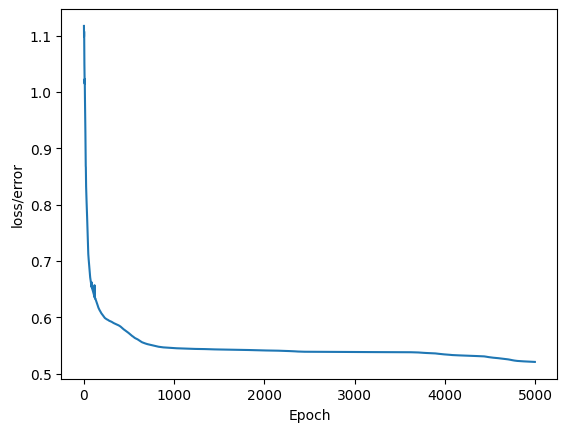

In [172]:
classifier = NNModel(seed=seed, num_hidden_layers=num_hidden_layers)

criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.Rprop(classifier.parameters(), lr=learning_rate)

train_model(optimiser, criterion, epochs, classifier)

### SGD


Epoch: 0 and loss: 1.1044816970825195
Epoch: 100 and loss: 1.0053973197937012
Epoch: 200 and loss: 0.733429491519928
Epoch: 300 and loss: 0.6740202903747559
Epoch: 400 and loss: 0.6214762926101685
Epoch: 500 and loss: 0.5967893600463867
Epoch: 600 and loss: 0.577989935874939
Epoch: 700 and loss: 0.5659088492393494
Epoch: 800 and loss: 0.5519232153892517
Epoch: 900 and loss: 0.5416374206542969
Epoch: 1000 and loss: 0.5275532603263855
Epoch: 1100 and loss: 0.5163849592208862
Epoch: 1200 and loss: 0.5193167924880981
Epoch: 1300 and loss: 0.5022267699241638
Epoch: 1400 and loss: 0.4932146966457367
Epoch: 1500 and loss: 0.49430036544799805
Epoch: 1600 and loss: 0.46242839097976685
Epoch: 1700 and loss: 0.5177316665649414
Epoch: 1800 and loss: 0.46620500087738037
Epoch: 1900 and loss: 0.5732105374336243
Epoch: 2000 and loss: 0.45578449964523315
Epoch: 2100 and loss: 0.4588054418563843
Epoch: 2200 and loss: 0.44468972086906433
Epoch: 2300 and loss: 0.4336485266685486
Epoch: 2400 and loss: 0.4

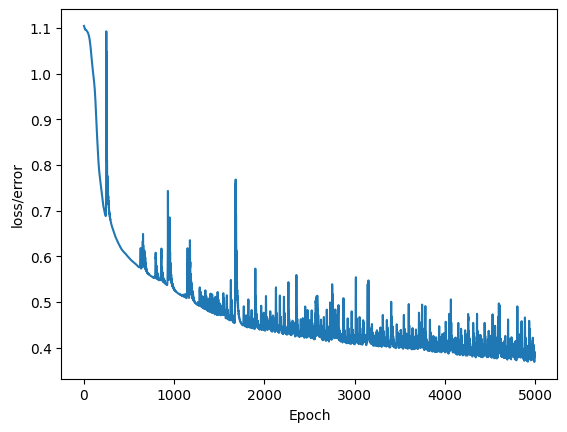

In [173]:
classifier = NNModel(seed=seed, num_hidden_layers=num_hidden_layers)

criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(classifier.parameters(), lr=learning_rate, momentum=momentum)

train_model(optimiser, criterion, epochs, classifier)